# **Business Problem**
 1. Develop a predictive model to identify whether mushrrom is good or poisonous beased on various feature of mushrooms
 2. A general guidline for features, people should look out for when picking mushrooms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df['class'].unique()

array(['p', 'e'], dtype=object)

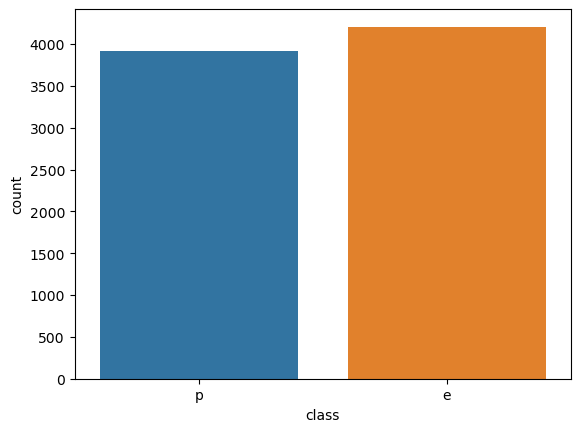

In [6]:
sns.countplot(data=df, x='class')
plt.show()

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [12]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# **X & y**

In [14]:
X = pd.get_dummies(df.drop('class', axis=1),drop_first=True)
y = df['class']

# **Train/Test Split**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### **AdaBoost classifier model with default parameters**

In [23]:
# Modelling 
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Prediction
ypred_train = model.predict(X_train)
predictions = model.predict(X_test)

# Evalution
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(y_train, ypred_train))
print('Test acuracy:', accuracy_score(y_test, predictions))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print('Cross Validation Score:', scores.mean())

Train accuracy: 0.99523003539006
Test acuracy: 0.9944615384615385
Cross Validation Score: 0.9053133762788935


**Identifying best parameters for adaboost model using Hyperparameter Tining**

In [25]:
from sklearn.model_selection import GridSearchCV

#Model/Estomator
estimator = AdaBoostClassifier()

# Paramaters grid
param_grid = {'n_estimators':list(range(1,51))}

# gris search
grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')

#fit the data
grid.fit(X_train, y_train)

# best parameters for AdaBoost model
grid.best_params_

{'n_estimators': 46}

#### **Feature Importance**

In [27]:
grid.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10080635, 0.17356908,
       0.05330362, 0.        , 0.07683086, 0.04435789, 0.        ,
       0.        , 0.        , 0.03279102, 0.08767941, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05830217, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                    index=X.columns,
                    columns=['Importance'])
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [31]:
important_features = feats[feats['Importance']>0]
important_features

,Importance
odor_c,0.100806
odor_f,0.173569
odor_l,0.053304
odor_n,0.076831
odor_p,0.044358
gill-spacing_w,0.032791
gill-size_n,0.087679
stalk-surface-above-ring_k,0.058302
spore-print-color_k,0.030538
spore-print-color_n,0.036626


In [32]:
imp_features_list = feats[feats['Importance']>0].index.to_list()
imp_features_list

['odor_c',
 'odor_f',
 'odor_l',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'spore-print-color_k',
 'spore-print-color_n',
 'spore-print-color_r',
 'spore-print-color_u',
 'spore-print-color_w',
 'population_c',
 'population_v']

In [35]:
X_imp = X[imp_features_list]
X_imp

,odor_c,odor_f,odor_l,odor_n,odor_p,gill-spacing_w,gill-size_n,stalk-surface-above-ring_k,spore-print-color_k,spore-print-color_n,spore-print-color_r,spore-print-color_u,spore-print-color_w,population_c,population_v
0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
8120,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
8121,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
8122,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True


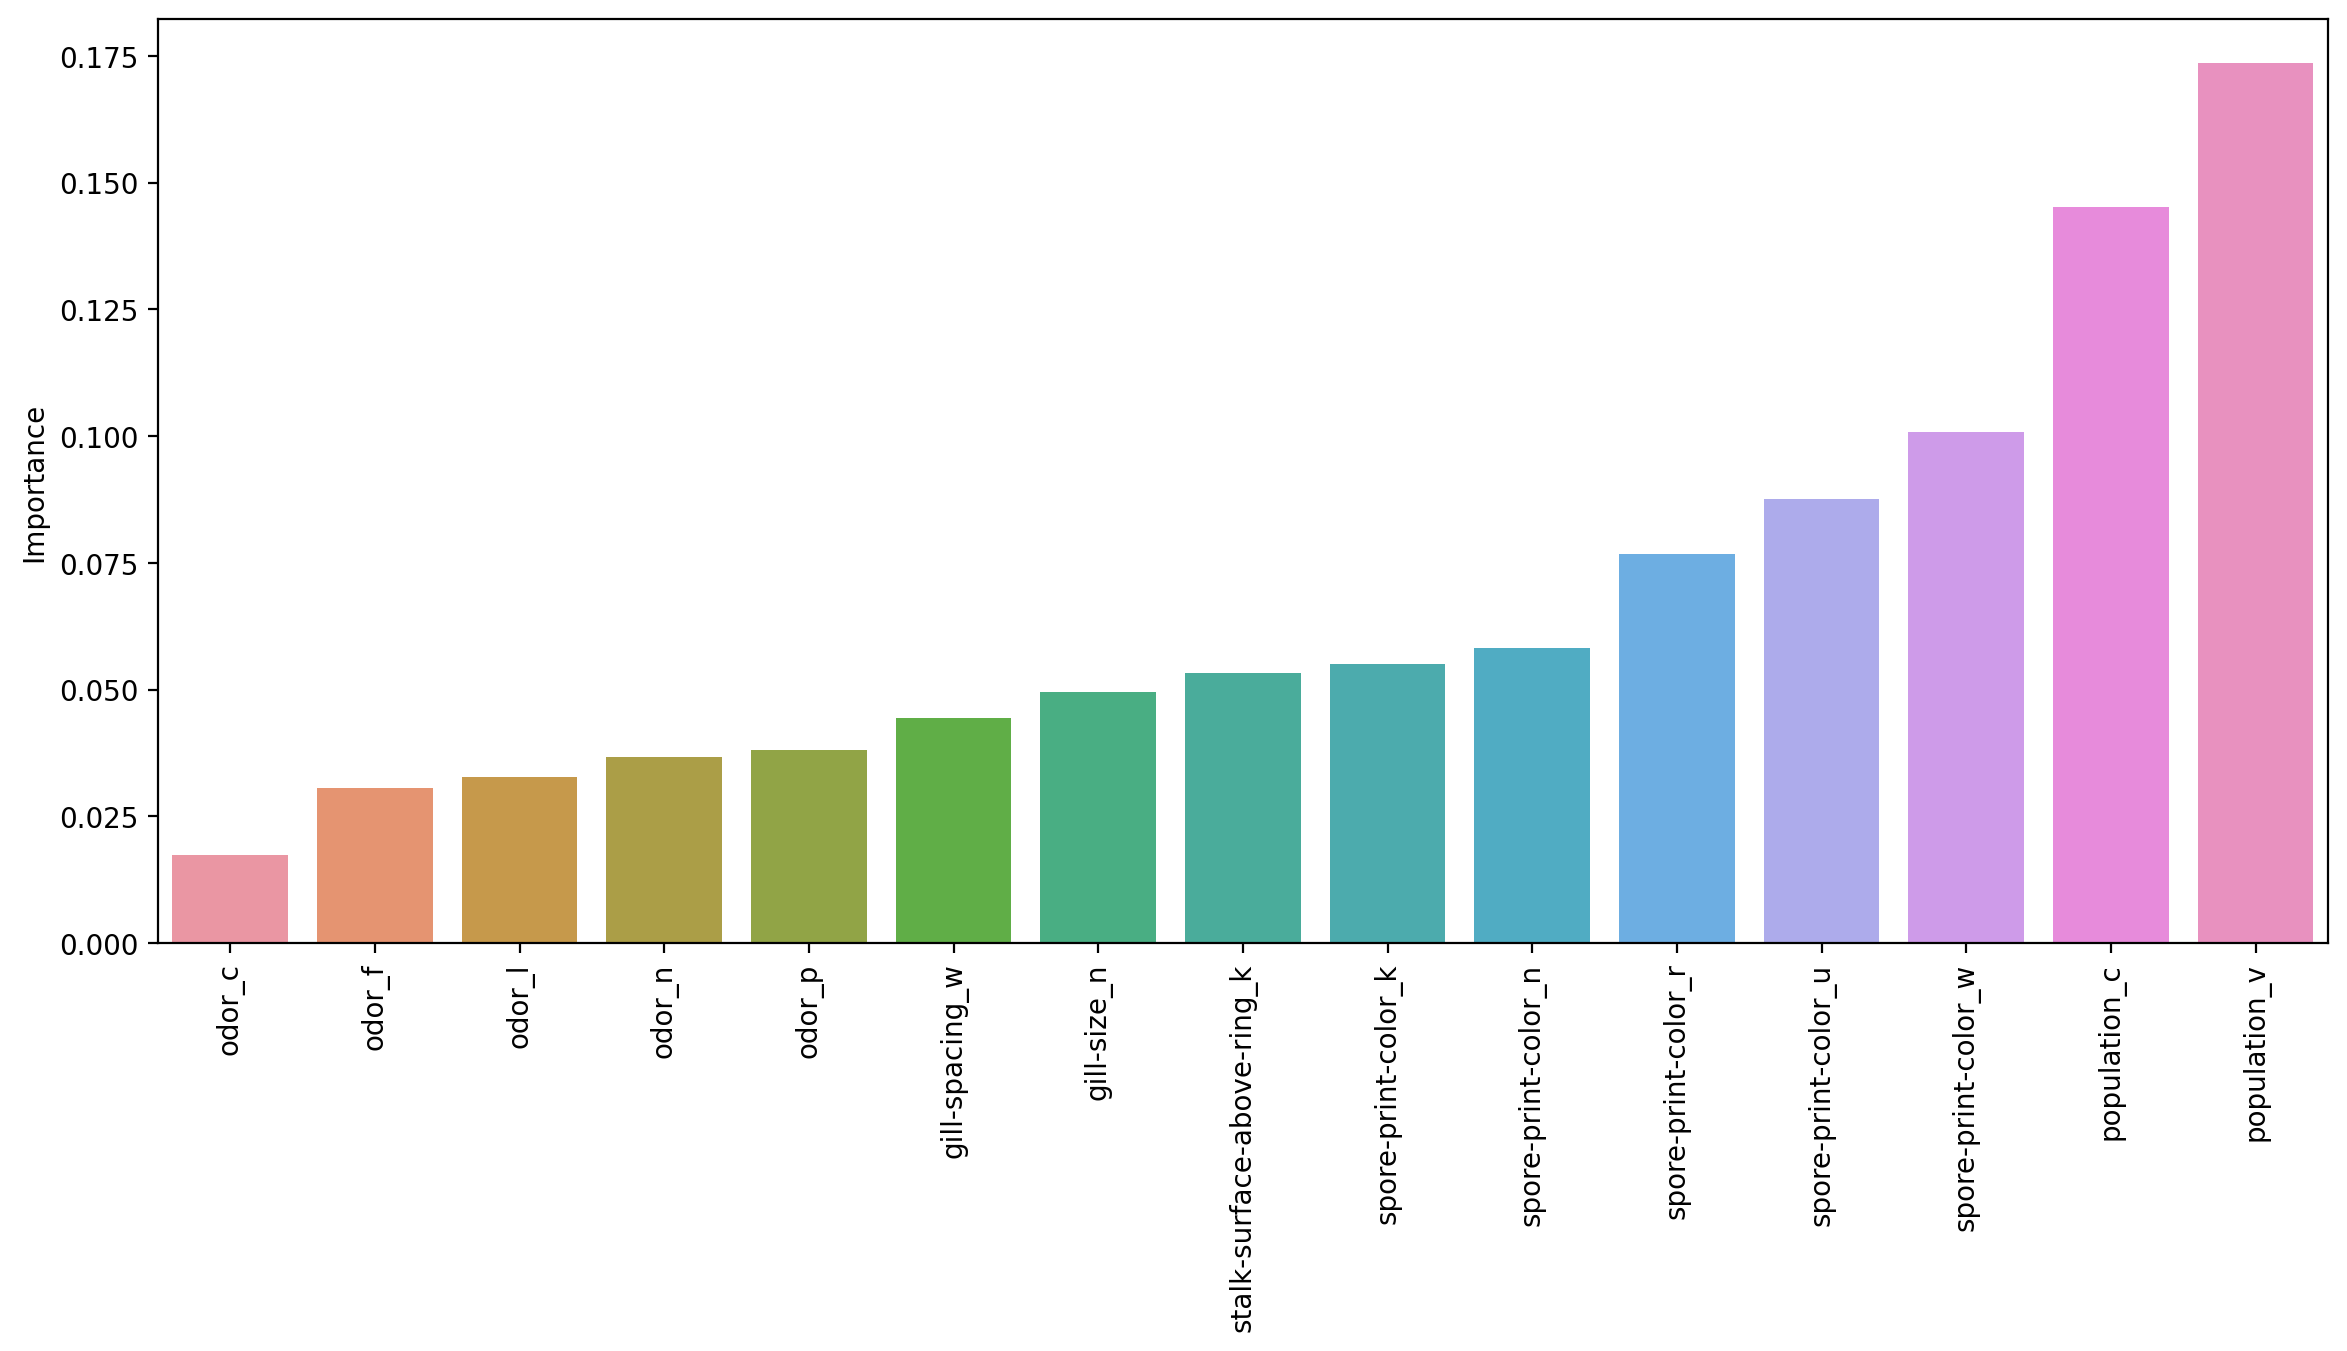

In [38]:
plt.figure(figsize=(14,6),dpi=200)

sns.barplot(data=important_features.sort_values('Importance'),
           x=important_features.index,
           y='Importance')
plt.xticks(rotation=90)
plt.show()

## **AdaBoost with best hyperparameters**

In [41]:
# Dropped unimportant
X_imp = X[imp_features_list]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=10)

# Modelling
ada_bhp = AdaBoostClassifier(n_estimators=20)
ada_bhp.fit(X_train, y_train)

# Prediction
ypred_train = ada_bhp.predict(X_train)
predictions = ada_bhp.predict(X_test)

# Evalutions
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(y_train, ypred_train))
print('Test accuracy:', accuracy_score(y_test, predictions))

scores - cross_val_score(ada_bhp, X_imp, y, cv=5)
print('Cross Validation Score:', scores.mean())

Train accuracy: 0.9827665794737652
Test accuracy: 0.9852307692307692
Cross Validation Score: 0.9053133762788935


#### **Confusion Matrix**

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[850,  11],
       [ 13, 751]], dtype=int64)